![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# German Traffic Sign Recognition
Multi-class, single-image classification

### Dataset
The German Traffic Sign Benchmark is a multi-class, single-image classification challenge held at the International Joint Conference on Neural Networks (IJCNN) 2011. They cordially invite researchers from relevant fields to participate: The competition is designed to allow for participation without special domain knowledge. Their benchmark has the following properties:

- Single-image, multi-class classification problem
- More than 40 classes
- More than 50,000 images in total
- Large, lifelike database

#### Notes
- For this project, we have reduced the number of images. There are around 16,500+ images in the dataset provided. You can check “label_details” folder for getting information about the classes.
- If the model is taking too much time to get trained then you can reduce the number of classes. There are around 43 classes in the dataset, model should be trained on a minimum of 15 classes.

### Initialize ImageDataGenerator (5 Marks)
- Rescale the images
- Specify value for validation_split & get 75% data in training and 25% data in training

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['font.size'] = 16

import numpy as np
import pandas as pd
import seaborn as sns

import os
import datetime as dt
from glob import glob

import tensorflow as tf
import keras
from keras.applications import xception
from keras.preprocessing import image
from keras.utils import np_utils
from mpl_toolkits.axes_grid1 import ImageGrid

from tqdm import tqdm

from sklearn import preprocessing
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

Using TensorFlow backend.


In [2]:
data_dir = './main_data/'
label_dir = './label_details/'

scaleTo = 128

In [3]:
def read_image(filepath, size):
    img = image.load_img(os.path.join(data_dir, filepath), target_size=size)
    img = image.img_to_array(img)
    return img

In [4]:
all_categories = [os.path.splitext(filename)[0] for filename in sorted(os.listdir(label_dir))]
classes = len(all_categories)

print(all_categories)
print('\nTotal Labels: ', classes)

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']

Total Labels:  43


In [5]:
path = data_dir + '*/*.png' 
files = glob(path)
total_images = len(files)

total_images

19172

In [7]:
images = []
labels = []

path = data_dir + '*/*.png' 
files = glob(path)
total_images = len(files)
index = 1

for category in all_categories:
    for file in os.listdir(os.path.join(data_dir, category)):    
        print(str(index) + "/" + str(total_images), end="\r")
        index = index + 1
        path = '{}/{}'.format(category, file)
        
        labels.append(category)
        images.append(read_image(path, (scaleTo, scaleTo)))
        

In [8]:
data_images = np.asarray(images)
data_images

array([[[[ 75.,  78.,  80.],
         [ 75.,  78.,  80.],
         [ 75.,  78.,  80.],
         ...,
         [ 66.,  67.,  66.],
         [ 66.,  67.,  66.],
         [ 66.,  67.,  66.]],

        [[ 75.,  78.,  80.],
         [ 75.,  78.,  80.],
         [ 75.,  78.,  80.],
         ...,
         [ 66.,  67.,  66.],
         [ 66.,  67.,  66.],
         [ 66.,  67.,  66.]],

        [[ 75.,  78.,  80.],
         [ 75.,  78.,  80.],
         [ 75.,  78.,  80.],
         ...,
         [ 66.,  67.,  66.],
         [ 66.,  67.,  66.],
         [ 66.,  67.,  66.]],

        ...,

        [[ 85.,  84.,  87.],
         [ 85.,  84.,  87.],
         [ 85.,  84.,  87.],
         ...,
         [ 90.,  97.,  89.],
         [ 90.,  97.,  89.],
         [ 90.,  97.,  89.]],

        [[ 85.,  84.,  87.],
         [ 85.,  84.,  87.],
         [ 85.,  84.,  87.],
         ...,
         [ 90.,  97.,  89.],
         [ 90.,  97.,  89.],
         [ 90.,  97.,  89.]],

        [[ 85.,  84.,  87.],
       

In [9]:
data_labels = pd.DataFrame(labels, columns=['category'])
data_labels.head()

,category
0,0
1,0
2,0
3,0
4,0


In [10]:
print('Images Data: ', data_images.shape)
print('Images Label: ', data_labels.shape)

Images Data:  (19172, 128, 128, 3)
Images Label:  (19172, 1)


In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_images, data_labels, test_size=0.25, random_state=40)

In [12]:
print('Train set: ', x_train.shape)
print('Test set: ', x_test.shape)
print('Train label : ', y_train.shape)
print('Test label : ', y_test.shape)

Train set:  (14379, 128, 128, 3)
Test set:  (4793, 128, 128, 3)
Train label :  (14379, 1)
Test label :  (4793, 1)


In [13]:
x_train = x_train.reshape(x_train.shape[0], scaleTo, scaleTo, 3).astype('float32')
x_test = x_test.reshape(x_test.shape[0], scaleTo, scaleTo, 3).astype('float32')

x_train = x_train / 255
x_test = x_test / 255

In [14]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=43)

y_test = tf.keras.utils.to_categorical(y_test, num_classes=43)

### Sample Images

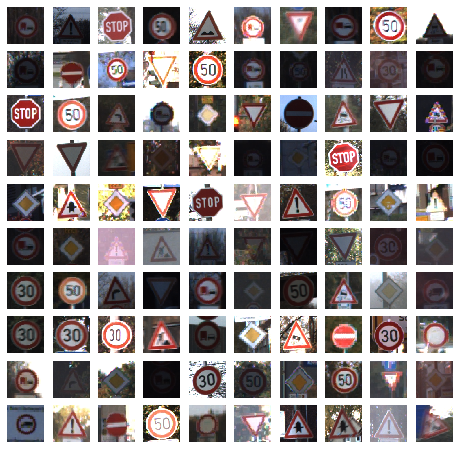

In [15]:
fig=plt.figure(figsize=(8,8))
columns=10
rows=10
for i in range(1, columns*rows+1):
    img=x_train[i]
    fig.add_subplot(rows,columns,i)
    plt.imshow(img,cmap='gray')
    plt.axis('off')
plt.show()

### Get training data from ImageDataGenerator (5 Marks)
- Give directory path
- Give target size
- Give batch_size
- Specify classes, if you wish to use less number of classes you need to give class names in a list (Atleast 15 classes should be there)
- Specify class_mode
- Specify color_mode
- Specify subset

You can get details here
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [16]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=180,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically 
        horizontal_flip=True,  # randomly flip images horizontally
        vertical_flip=True  # randomly flip images vertically
    )  
datagen.fit(x_train)

In [18]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.2,
        rotation_range=180,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        data_dir,
        target_size=(scaleTo, scaleTo),
        batch_size=32,
        class_mode=None)        

Found 19172 images belonging to 43 classes.


### Get validation data from ImageDataGenerator (5 Marks)
- Give directory path
- Give target size
- Give batch_size
- Specify classes, if you wish to use less number of classes you need to give class names in a list (Atleast 15 classes should be there)
- Specify class_mode
- Specify color_mode
- Specify subset

You can get details here
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [19]:
validation_generator = train_datagen.flow_from_directory(
        data_dir,
        target_size=(scaleTo, scaleTo),
        batch_size=32,
        class_mode=None)

Found 19172 images belonging to 43 classes.


### Define model (5 Marks)
- Initialize a Sequential Model
- Add Convolution, Maxpool, Dropout, Flatten & Dense layers according to your model architecture

In [20]:
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers import Convolution2D, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization

In [21]:
model = keras.Sequential()

# 1st Conv layer
model.add(Conv2D(32, 3, 3, input_shape=(scaleTo, scaleTo, 3)))
model.add(Activation('relu'))

# 2nd Conv layer
model.add(Conv2D(32, 3, 3))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(43))
model.add(Activation('softmax'))

C:\Users\Amol\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(128, 128,...)`
  after removing the cwd from sys.path.
C:\Users\Amol\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


### Compile the model (2 Marks)
- Specify optimizer, loss & metrics

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Get model summary (2 Marks)

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 124, 124, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 123008)           

### Fit the model (3 Marks)
- Specify epochs
- Specify batch_size
- Give validation_data
- Validation accuracy should be more than 90%

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

In [25]:
history = model.fit_generator(datagen.flow(x_train, y_train), steps_per_epoch=50, validation_data=(x_test, y_test), epochs = 10, verbose = 1, callbacks=callback_list)


Epoch 1/10
50/50 [==============================] - ETA: 2:51 - loss: 3.7713 - accuracy: 0.06 - ETA: 1:40 - loss: 5.5841 - accuracy: 0.06 - ETA: 1:14 - loss: 5.6846 - accuracy: 0.08 - ETA: 1:02 - loss: 5.6228 - accuracy: 0.06 - ETA: 53s - loss: 5.4409 - accuracy: 0.0562 - ETA: 47s - loss: 5.1445 - accuracy: 0.052 - ETA: 43s - loss: 4.9156 - accuracy: 0.049 - ETA: 41s - loss: 4.7350 - accuracy: 0.050 - ETA: 38s - loss: 4.6051 - accuracy: 0.052 - ETA: 36s - loss: 4.4823 - accuracy: 0.053 - ETA: 34s - loss: 4.3805 - accuracy: 0.059 - ETA: 32s - loss: 4.3132 - accuracy: 0.059 - ETA: 31s - loss: 4.2482 - accuracy: 0.060 - ETA: 29s - loss: 4.1880 - accuracy: 0.067 - ETA: 28s - loss: 4.1289 - accuracy: 0.068 - ETA: 27s - loss: 4.0916 - accuracy: 0.066 - ETA: 27s - loss: 4.0522 - accuracy: 0.064 - ETA: 26s - loss: 4.0026 - accuracy: 0.066 - ETA: 25s - loss: 3.9734 - accuracy: 0.065 - ETA: 24s - loss: 3.9373 - accuracy: 0.071 - ETA: 24s - loss: 3.9042 - accuracy: 0.077 - ETA: 23s - loss: 3.872

C:\Users\Amol\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 2/10
50/50 [==============================] - ETA: 29s - loss: 3.1538 - accuracy: 0.093 - ETA: 27s - loss: 3.0379 - accuracy: 0.125 - ETA: 27s - loss: 3.0479 - accuracy: 0.125 - ETA: 26s - loss: 2.9929 - accuracy: 0.109 - ETA: 27s - loss: 2.9966 - accuracy: 0.112 - ETA: 28s - loss: 2.9441 - accuracy: 0.119 - ETA: 27s - loss: 2.9856 - accuracy: 0.116 - ETA: 27s - loss: 3.0086 - accuracy: 0.113 - ETA: 26s - loss: 3.0434 - accuracy: 0.104 - ETA: 26s - loss: 3.0083 - accuracy: 0.115 - ETA: 25s - loss: 3.0484 - accuracy: 0.116 - ETA: 24s - loss: 3.0459 - accuracy: 0.117 - ETA: 23s - loss: 3.0289 - accuracy: 0.122 - ETA: 22s - loss: 3.0110 - accuracy: 0.127 - ETA: 22s - loss: 3.0247 - accuracy: 0.129 - ETA: 21s - loss: 3.0275 - accuracy: 0.128 - ETA: 20s - loss: 3.0138 - accuracy: 0.130 - ETA: 19s - loss: 2.9867 - accuracy: 0.138 - ETA: 19s - loss: 2.9770 - accuracy: 0.138 - ETA: 18s - loss: 2.9754 - accuracy: 0.135 - ETA: 18s - loss: 2.9819 - accuracy: 0.135 - ETA: 17s - loss: 2.9590 

50/50 [==============================] - ETA: 26s - loss: 3.2630 - accuracy: 0.187 - ETA: 27s - loss: 2.9380 - accuracy: 0.218 - ETA: 28s - loss: 2.8759 - accuracy: 0.218 - ETA: 29s - loss: 2.7374 - accuracy: 0.234 - ETA: 29s - loss: 2.7025 - accuracy: 0.231 - ETA: 29s - loss: 2.7186 - accuracy: 0.224 - ETA: 28s - loss: 2.6582 - accuracy: 0.241 - ETA: 28s - loss: 2.6319 - accuracy: 0.238 - ETA: 27s - loss: 2.6257 - accuracy: 0.239 - ETA: 25s - loss: 2.6178 - accuracy: 0.228 - ETA: 25s - loss: 2.6127 - accuracy: 0.227 - ETA: 24s - loss: 2.6025 - accuracy: 0.231 - ETA: 23s - loss: 2.6010 - accuracy: 0.235 - ETA: 22s - loss: 2.5646 - accuracy: 0.245 - ETA: 22s - loss: 2.5493 - accuracy: 0.245 - ETA: 21s - loss: 2.5506 - accuracy: 0.250 - ETA: 20s - loss: 2.5750 - accuracy: 0.248 - ETA: 20s - loss: 2.5522 - accuracy: 0.255 - ETA: 19s - loss: 2.5340 - accuracy: 0.256 - ETA: 18s - loss: 2.5363 - accuracy: 0.260 - ETA: 17s - loss: 2.5204 - accuracy: 0.261 - ETA: 17s - loss: 2.5195 - accuracy:

50/50 [==============================] - ETA: 24s - loss: 2.1168 - accuracy: 0.281 - ETA: 27s - loss: 2.0590 - accuracy: 0.343 - ETA: 25s - loss: 2.0664 - accuracy: 0.375 - ETA: 24s - loss: 2.1283 - accuracy: 0.359 - ETA: 24s - loss: 2.1582 - accuracy: 0.356 - ETA: 23s - loss: 2.1197 - accuracy: 0.369 - ETA: 23s - loss: 2.1543 - accuracy: 0.361 - ETA: 22s - loss: 2.1857 - accuracy: 0.355 - ETA: 21s - loss: 2.1448 - accuracy: 0.368 - ETA: 21s - loss: 2.1420 - accuracy: 0.362 - ETA: 20s - loss: 2.1292 - accuracy: 0.366 - ETA: 20s - loss: 2.1163 - accuracy: 0.369 - ETA: 20s - loss: 2.1156 - accuracy: 0.365 - ETA: 19s - loss: 2.1114 - accuracy: 0.366 - ETA: 18s - loss: 2.1123 - accuracy: 0.364 - ETA: 18s - loss: 2.1273 - accuracy: 0.361 - ETA: 17s - loss: 2.1323 - accuracy: 0.358 - ETA: 17s - loss: 2.1307 - accuracy: 0.355 - ETA: 16s - loss: 2.1397 - accuracy: 0.355 - ETA: 16s - loss: 2.1226 - accuracy: 0.354 - ETA: 15s - loss: 2.1343 - accuracy: 0.355 - ETA: 15s - loss: 2.1299 - accuracy:

In [26]:
result = model.evaluate(x_test, y_test)

4793/4793 [==============================] - ETA: 23 - ETA: 21 - ETA: 21 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 19 - ETA: 20 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 18 - ETA: 18 - ETA: 18 - ETA: 18 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 16 - ETA: 16 - ETA: 16 - ETA: 16 - ETA: 16 - ETA: 16 - ETA: 15 - ETA: 15 - ETA: 15 - ETA: 15 - ETA: 15 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  

In [27]:
result

[1.7568953018359592, 0.4506572186946869]

In [28]:
pred = model.predict(x_test)

In [29]:
pred

array([[9.7461091e-03, 1.0975568e-01, 6.2704265e-02, ..., 3.8239028e-05,
        1.0754891e-04, 6.3507869e-05],
       [1.6327856e-02, 1.3625845e-01, 8.0420598e-02, ..., 4.1939831e-05,
        5.6174762e-05, 4.3946235e-05],
       [3.7572887e-03, 1.2660809e-01, 6.1164901e-02, ..., 2.0211692e-06,
        9.2183673e-06, 2.5482616e-06],
       ...,
       [2.4735474e-03, 6.0962789e-02, 7.9937719e-02, ..., 1.1570038e-05,
        5.0731993e-05, 2.8376200e-05],
       [3.7671868e-03, 9.2458077e-02, 1.1327512e-01, ..., 1.0574045e-05,
        3.5075533e-05, 1.8422390e-05],
       [1.0736890e-02, 4.9992990e-01, 2.9169083e-01, ..., 3.0978782e-08,
        3.2535831e-07, 1.0642283e-07]], dtype=float32)

In [30]:
predNum = np.argmax(pred, axis=1)
print(predNum)

[13 14 13 ... 10 13  1]


In [31]:
test_seed_result = []

for index in range(0, len(predNum)):
    test_seed_result.append(all_categories[predNum[index]])
    
test_seed_result

['20',
 '21',
 '20',
 '1',
 '20',
 '1',
 '1',
 '20',
 '20',
 '20',
 '1',
 '24',
 '10',
 '20',
 '20',
 '20',
 '20',
 '1',
 '20',
 '20',
 '20',
 '20',
 '20',
 '2',
 '1',
 '20',
 '18',
 '20',
 '20',
 '2',
 '2',
 '20',
 '20',
 '2',
 '20',
 '1',
 '20',
 '2',
 '1',
 '2',
 '2',
 '18',
 '20',
 '20',
 '21',
 '20',
 '1',
 '20',
 '20',
 '20',
 '2',
 '20',
 '20',
 '20',
 '1',
 '20',
 '20',
 '2',
 '24',
 '21',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '24',
 '2',
 '24',
 '20',
 '1',
 '18',
 '24',
 '20',
 '20',
 '20',
 '2',
 '20',
 '18',
 '1',
 '20',
 '2',
 '20',
 '1',
 '20',
 '1',
 '20',
 '1',
 '1',
 '24',
 '1',
 '21',
 '20',
 '2',
 '1',
 '1',
 '2',
 '1',
 '24',
 '20',
 '20',
 '1',
 '20',
 '20',
 '20',
 '1',
 '20',
 '1',
 '20',
 '1',
 '20',
 '24',
 '20',
 '1',
 '1',
 '1',
 '20',
 '20',
 '24',
 '20',
 '24',
 '20',
 '24',
 '1',
 '20',
 '1',
 '21',
 '1',
 '25',
 '21',
 '10',
 '2',
 '20',
 '1',
 '20',
 '1',
 '20',
 '20',
 '20',
 '1',
 '1',
 '20',
 '1',
 '21',
 '21',
 '1',
 '20',
 '1',
 '1',
 '25',
 '2

### Draw plots (3 Marks)
- Plot training accuracy and validation accuracy with respect to epochs

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


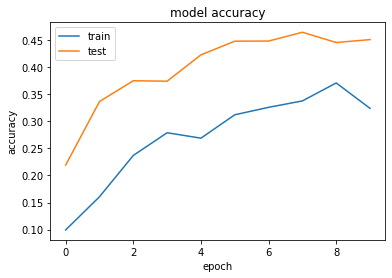

In [32]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


- Plot training loss and validation loss with respect to epochs

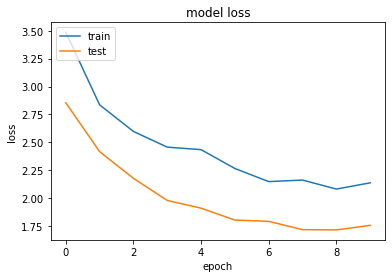

In [33]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()